---

# mplfinance subplots using the "Panels Method"

---

### Introduction:
* Mplfinance allows users to create up to ten vertically stacked "*panels*", all sharing the same date/time x-axis.
* Here is an example showing 3 panels:

![sample_subplot](data/sample_subplot.png)

### Features and Basic Terminology
* Panels are identified by their "Panel ID", an integer ranging from 0 to 31.
* Panel ID's are always numbered from top to bottom, thus:
  - Panel 0 is always the uppermost panel, Panel 1 is just below that, and so on.
* The "*main panel*" is the panel where candlesticks/ohlc data are plotted.
  - In the above example, the "main panel" is in the middle (which in this example is Panel 1)
<br><br>
* Users can choose which panel is the *main panel*, and on which panel to plot *volume*.
  - By default, if not specified, Panel 0 (the *uppermost* panel) is used for candlesticks/ohlc data.
  - By default, if not specified, Panel 1 (second from top) is used for volume.
  - Previous versions of mplfinance that supported only two panels called these panels "main" and "lower".  For backwards compatibility, if any code passes in `panel='main'` that will be translated to `panel=0` and `panel='lower'` will be translated to `panel=1`.  Going forward, however, users should use only integers to identify panels.
<br><br>
* The relative sizes of panels may be specified with the `panel_ratios` kwarg.
  - See below for example usage.
  - By default, if not specified, the main panel is 2.5 times the height of all other panels (and all other panels are equal in size to one another).
<br><br>
* mplfinance automatically determines how many panels are needed, based on which panels were specified for the main panel, volume panel, and each of the addplot panels.


---

## PLEASE NOTE:  This tutorial ASSUMES you have already read:<br><br>&nbsp;&nbsp;&nbsp; [Adding Your Own Technical Studies to Plots](https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb)

---

---
---

## Examples:

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Let's grab 5 months of data from the input data frame:

In [4]:
df = idf.loc['2011-07-01':'2011-12-30',:]

---

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.10b0'

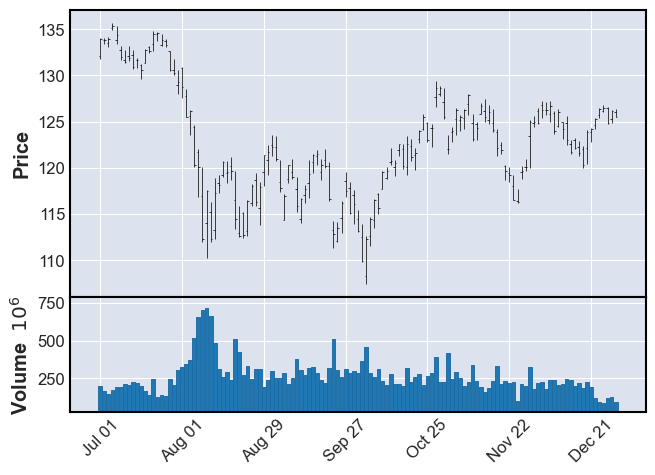

In [5]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True)

---

#### We can switch which panel is main and which contains volume:

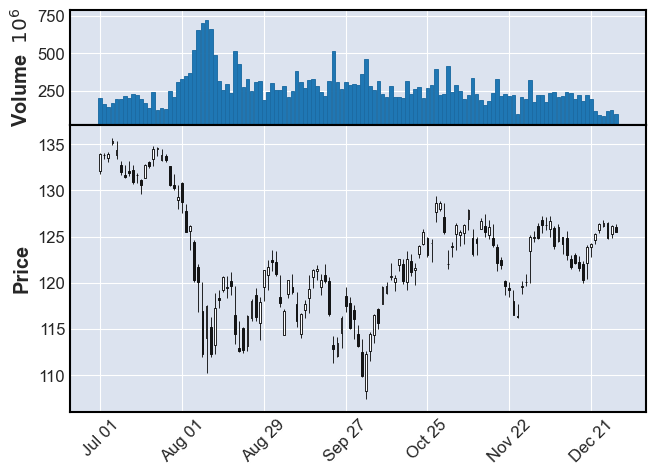

In [6]:
mpf.plot(df,type='candle',volume=True,main_panel=1,volume_panel=0)

---

or we can make both panels the same size:

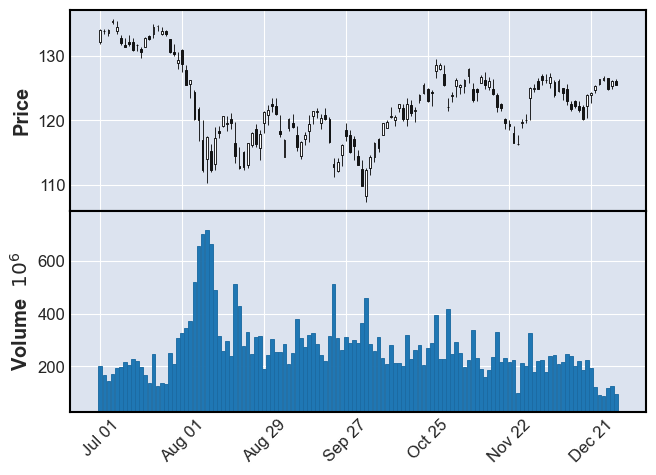

In [7]:
mpf.plot(df,type='candle',volume=True,panel_ratios=(1,1))

---

Or make the main panel 4 times that of the volume panel:

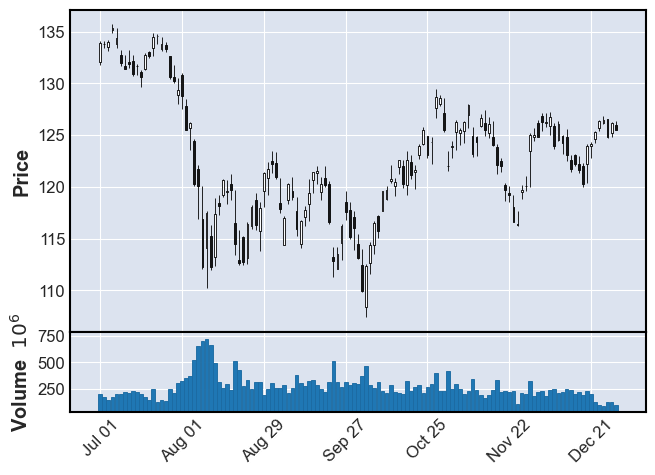

In [8]:
mpf.plot(df,type='candle',volume=True,panel_ratios=(4,1))

---

Let's add a third panel containing bollinger data.

By default addplot uses Panel 0.

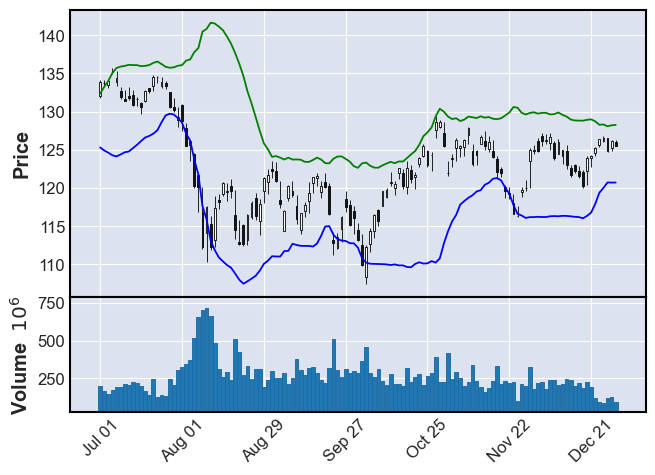

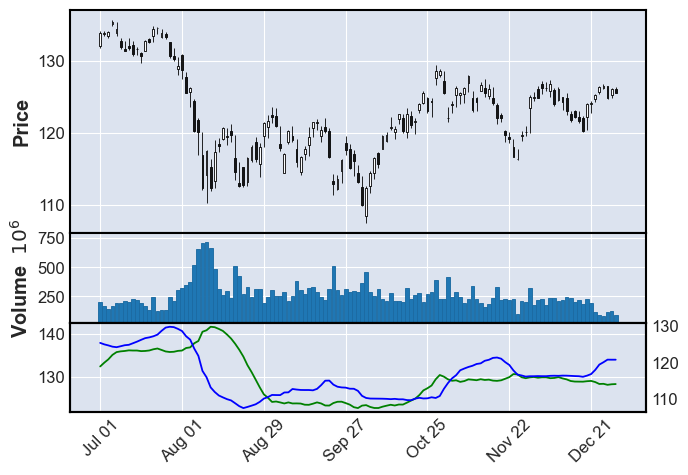

In [9]:
ap0 = [ mpf.make_addplot(df['UpperB'],color='g'),  # uses panel 0 by default
        mpf.make_addplot(df['LowerB'],color='b'),  # uses panel 0 by default
      ]
mpf.plot(df,type='candle',volume=True,addplot=ap0)  

ap2 = [ mpf.make_addplot(df['UpperB'],color='g',panel=2),  # panel 2 specified
        mpf.make_addplot(df['LowerB'],color='b',panel=2),  # panel 2 specified
      ]
mpf.plot(df,type='candle',volume=True,addplot=ap2)

---

Now that we have 3 panels, we can demonstrate how to use ` panel_ratios `

#### There are two ways to specify ` panel_ratios `:
1. As a sequence of numbers, **one for each panel**, to be applied in order to panel IDs 0, 1, 2, etc.
2. As a sequence of only **TWO** numbers:  The first number will be applied *to the **main** panel*, and the second number will be applied *to all other panels*.


- In the ambiguous case where there are only two panels, the sequence of panel_ratio numbers will be treated as in item #1:<br> The first number will apply to Panel 0, and the second to Panel 1 (regardless of which panel the user chooses for the main panel).


---

Let's rearrange the above plot to have the main panel on the bottom, and the volume panel on top.<br>
Then we will demonstrate the above two uses of panel_ratios.

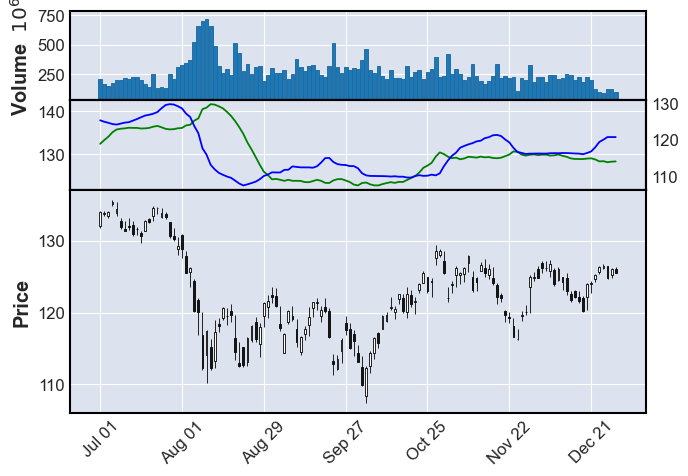

In [10]:
ap2 = [ mpf.make_addplot(df['UpperB'],color='g',panel=1),
        mpf.make_addplot(df['LowerB'],color='b',panel=1),
      ]
mpf.plot(df,type='candle',volume=True,main_panel=2,volume_panel=0,addplot=ap2)

---

As was mentioned previously,<br>the default for panel_ratios is that all panels are the same height *except* the main panel which is 2.5 times the height of the others.<br>**For the above example, this is equivalent to:**

1. specifying **` panel_ratios=(2,2,5) `<br>**(panel ID's 0 and 1 are each 2/5 the size of panel 2, and panel 2 is 5/2 times as high as each of the other two panels)<br><br>

2. or specifying **` panel_ratios=(5,2) `**<br>(main panel 5/2 times as high as the other panels, and all other panels 2/5 as high as the main panel),<br>


Both of the above `panel_ratios` specifications have the same effect, and both are equivalent to the default.  Note carefully that the first specification requires that we have in mind that the main panel will be on the bottom.  But the second specification does not.  The second specification however requires that all panels, other than the main panel, be the same size (a typical practice).  However if we want any panels *other than* the main panel to differ in size from each other, then we must use the first specification providing a ratio number for every panel in use.

For example:

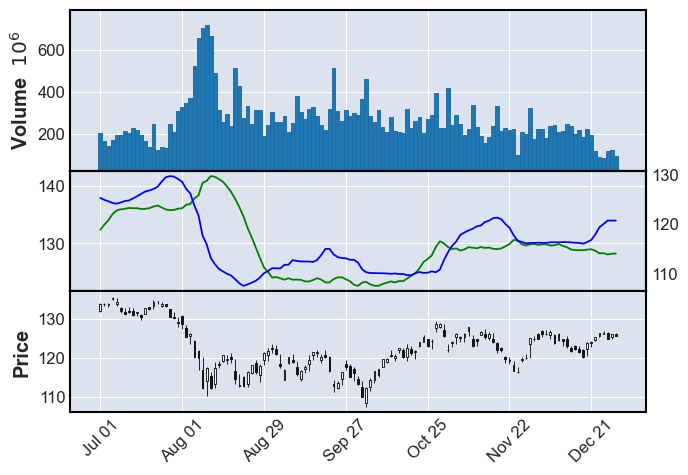

In [11]:
mpf.plot(df,type='candle',volume=True,main_panel=2,volume_panel=0,
         addplot=ap2,panel_ratios=(4,3,3))

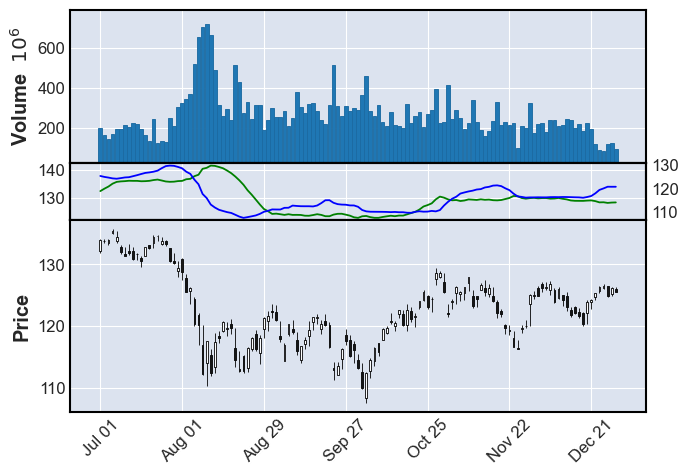

In [12]:
mpf.plot(df,type='candle',volume=True,main_panel=2,volume_panel=0,
         addplot=ap2,panel_ratios=(4,1.5,5))

---

---

Notice that in all of the above examples, mplfinance automatically determined ***how many*** panels we needed based on our specification of panel ID's.  This automatic determination however requires that we do *not* skip any panel ID's.  If we do, mplfinance will raise an exception:

In [13]:
mpf.plot(df,type='candle',volume=True,main_panel=3,volume_panel=0,addplot=ap2)

ValueError: inferred panel list is missing panels: [2]

<Figure size 800x575 with 0 Axes>

---

We can override this behavior by ***explicitly*** setting the number of panels, ***however*** the panel for the ID that was skipped will be empty of any plot:

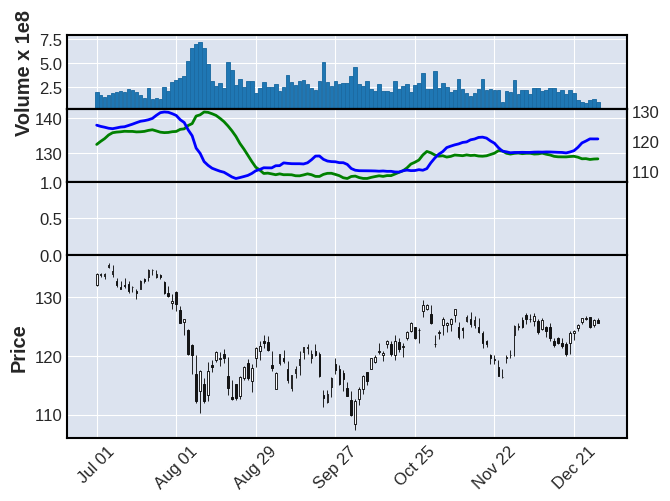

In [ ]:
mpf.plot(df,type='candle',volume=True,main_panel=3,volume_panel=0,addplot=ap2,num_panels=4)

---

Finally, we demonstate using these features to create a **MACD** plot (**M**oving **A**verage **C**onvergence **D**ivergence)

---

- First use Pandas to calculate the 12 period and 26 period exponential moving averages:

In [ ]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

---

* The MACD Line is defined as the difference between these two moving averages:

In [ ]:
macd = exp12 - exp26

---

* The MACD Signal is defined as the 9 period exponential moving average of the MACD Line:<br><br>
* We also calculate the difference between the MACD Line and the MACD Signal which we will plot as a histogram:

In [ ]:
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

---

### Now create our MACD plot:

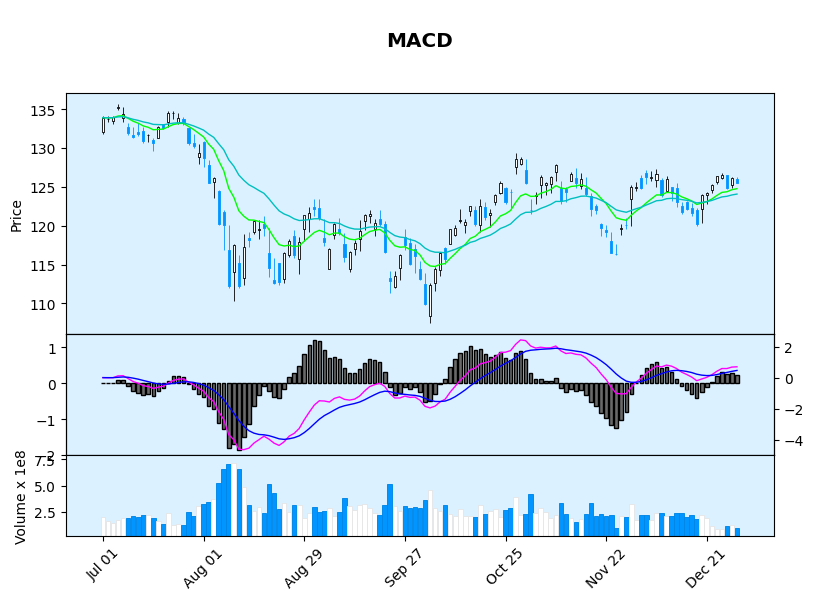

In [ ]:
apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))

---

- Just for fun, the same plot in a different style:

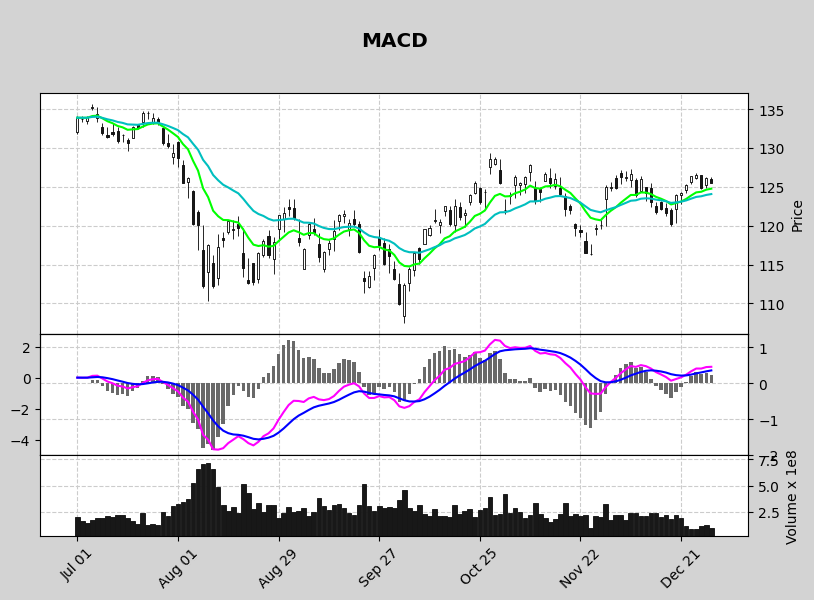

In [ ]:
s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2))